# objective 

- Our main aim is to precdict the wine quality iuseing ML through Python programing lang.
- A large dataset is consider and wine quality is modelled to analyes the quality of wine through the diffrent paramentes like fixed acidity , volatile acidity etc .
- All these parameters will be analysed through Ml algorithim which will help to rate the wine on scale 1 - 10 or bad - good .
- Output obatained would be further be checked for correctness and model will be optimaized accordinly .
- it can support the wine expert evulaution and ultinately improves the production .

In [1]:
# Import modules
%matplotlib inline

import time
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
from urllib.request import urlopen 



In [2]:
#Loading data set 


df = pd.read_csv('/Users/jayasinha/Downloads/QualityPrediction.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.info() # Check data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df.isnull().sum() # check the missing values 

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
df.describe() 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


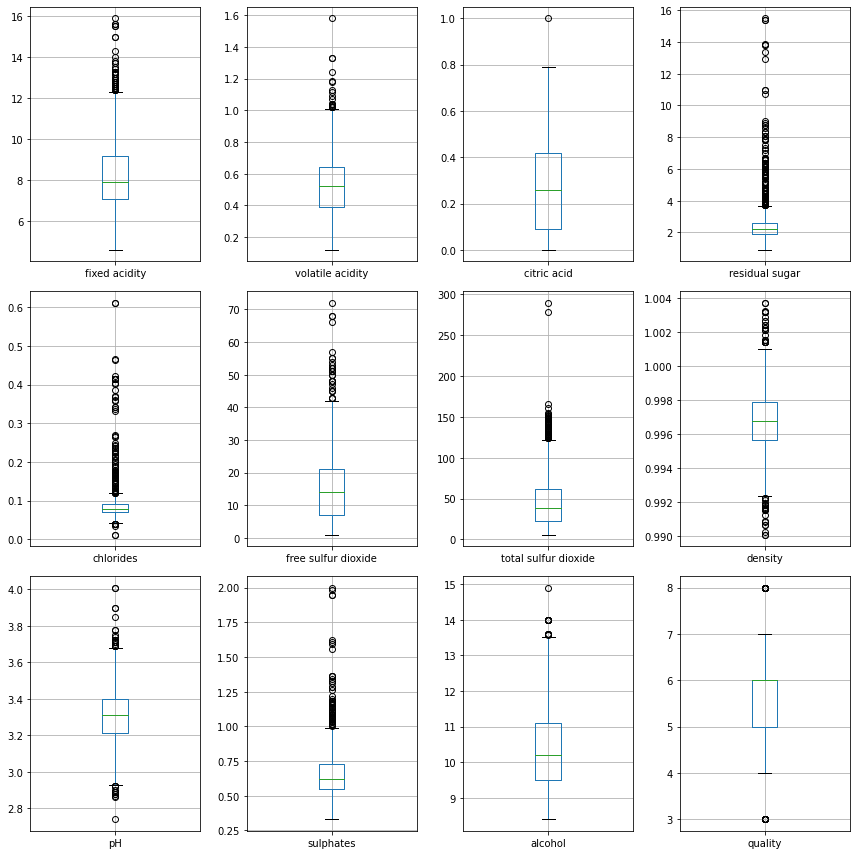

In [12]:
# Ploting graph to check pattern and trand .

# Box Plot .

df.plot(kind='box',subplots=True,grid=True,layout=(3,4),figsize=(12,12))
plt.tight_layout()
plt.show()

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

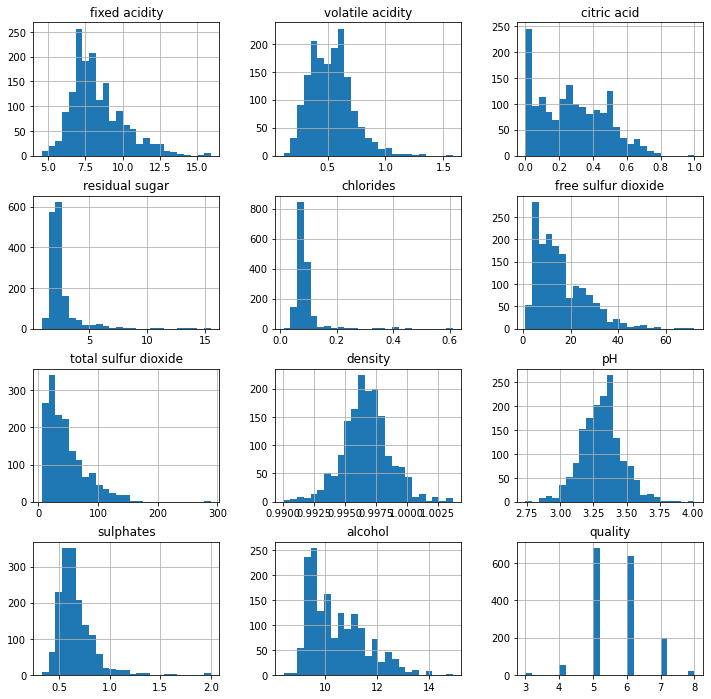

In [13]:
df.hist(bins=25,figsize=(12,12))

In [15]:
# Outlier dectation through IQR method .

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3- Q1 
print('IQR for given columan is : \n',IQR)

IQR for given columan is : 
 fixed acidity            2.100000
volatile acidity         0.250000
citric acid              0.330000
residual sugar           0.700000
chlorides                0.020000
free sulfur dioxide     14.000000
total sulfur dioxide    40.000000
density                  0.002235
pH                       0.190000
sulphates                0.180000
alcohol                  1.600000
quality                  1.000000
dtype: float64


- Below coment ,generates an output with the 'True' and 'False' values. Points where the values are 'True' represent the presence of the outlier.



In [21]:
print(df<(Q1-1.5*IQR)|(df>(Q3+1.5*IQR)))


      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0             False              True         True           False       True   
1             False              True         True           False       True   
2             False              True         True           False       True   
3             False              True         True           False       True   
4             False              True         True           False       True   
...             ...               ...          ...             ...        ...   
1594          False              True         True           False       True   
1595          False              True         True           False       True   
1596          False              True         True           False       True   
1597          False              True         True           False       True   
1598          False              True         True           False       True   

      free sulfur dioxide  

# outlier through z-score 

- Outlier detection and removal using 3 standard deviation One of the ways we can remove outliers is remove any data points that are beyond 3 standard deviation from mean. Which means we can come up with following upper and lower bounds.

In [23]:
from scipy import stats
z= np.abs(stats.zscore(df))
print(z)

[[0.52835961 0.96187667 1.39147228 ... 0.57920652 0.96024611 0.78782264]
 [0.29854743 1.96744245 1.39147228 ... 0.1289504  0.58477711 0.78782264]
 [0.29854743 1.29706527 1.18607043 ... 0.04808883 0.58477711 0.78782264]
 ...
 [1.1603431  0.09955388 0.72391627 ... 0.54204194 0.54162988 0.45084835]
 [1.39015528 0.65462046 0.77526673 ... 0.30598963 0.20930812 0.78782264]
 [1.33270223 1.21684919 1.02199944 ... 0.01092425 0.54162988 0.45084835]]


In [12]:
df_NOoutlier = df[(z<3).all(axis=1)]
df_NOoutlier

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [13]:
df_NOoutlier.shape




(1451, 12)

<AxesSubplot:>

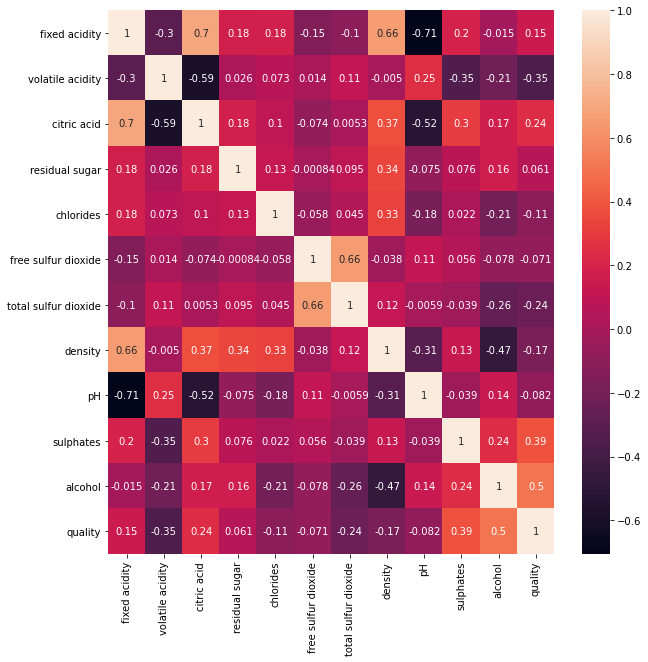

In [38]:
#plot heatmap 

plt.figure(figsize=[10,10])
sns.heatmap(df_NOoutlier.corr(),annot=True, )

In [14]:
# Seprate the target columan .

x= df_NOoutlier.drop(['quality'],axis='columns')
y=df_NOoutlier['quality']


In [18]:
# Spliting into train and test .


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=10)



In [25]:
# Normalization 

from sklearn.preprocessing import MinMaxScaler
#fit data
norm = MinMaxScaler()
# fit data
norm_fit = norm.fit(x_train)
new_xtrain = norm_fit.transform(x_train)
new_xtest = norm_fit.transform(x_test)
# display values


# Useing LogisticRegression

 

In [26]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()



In [30]:
model.fit(new_xtrain,y_train)

model.predict(x_test) # Precdition 

array([7, 5, 7, 5, 7, 7, 5, 7, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 7, 5, 7, 7,
       7, 7, 5, 7, 5, 5, 5, 7, 7, 5, 7, 5, 5, 6, 5, 5, 5, 5, 7, 7, 5, 7,
       5, 6, 7, 7, 5, 5, 5, 5, 5, 7, 5, 5, 7, 7, 7, 5, 5, 5, 5, 7, 7, 7,
       5, 7, 5, 5, 7, 7, 5, 5, 5, 5, 5, 5, 5, 7, 5, 7, 5, 5, 5, 5, 5, 5,
       7, 7, 5, 5, 5, 5, 5, 7, 6, 5, 5, 5, 5, 5, 5, 7, 5, 7, 5, 5, 7, 7,
       7, 7, 5, 5, 5, 5, 7, 7, 7, 5, 5, 7, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 7, 7, 5, 5, 5, 7, 7, 5, 7, 7, 7, 5, 5, 6, 5, 5, 5, 5,
       5, 5, 7, 7, 7, 5, 5, 5, 5, 5, 7, 7, 7, 7, 5, 5, 5, 5, 7, 5, 5, 5,
       7, 7, 5, 7, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 7, 5, 5,
       5, 5, 7, 5, 5, 5, 7, 6, 7, 5, 7, 5, 5, 5, 5, 5, 7, 7, 7, 5, 5, 5,
       7, 5, 7, 7, 5, 5, 5, 5, 7, 5, 5, 5, 5, 5, 5, 5, 5, 7, 5, 5, 5, 5,
       5, 5, 5, 5, 7, 5, 5, 5, 5, 5, 5, 7, 7, 5, 5, 7, 5, 5, 5, 5, 5, 5,
       7, 5, 5, 5, 7, 5, 7, 5, 7, 5, 5, 5, 7, 7, 5, 5, 5, 7, 5, 5, 5, 7,
       5, 7, 5, 5, 5, 7, 5, 7, 5, 5, 5, 5, 7, 5, 5,

In [31]:
model.score(new_xtest,y_test)

0.5756880733944955